**뉴스데이터 감성 분석**


**Task_1: 데이터 출처**

DACON, 2023 NH 투자증권 빅데이터 경진대회, “블룸버그, 나스닥과 함께 세계속으로!"

https://dacon.io/competitions/official/236145/overview/description


**TASK 2. 기초 통계 확인**


**TASK 3. 분석 목적/인사이트 설명**

1. 분석 목적: 금융 도메인에서 숨겨진 인사이트 탐색 AI 시스템을 만들기 위해, 우선적으로 뉴스데이터 감성 분석을 통한 전망 분석

2. 인사이트:
- 반복성 지표: 동일 제목(예, 배당 관련 뉴스)이 여러 번 등장. 이는 뉴스 콘텐츠의 중복 또는 인기 주제의 반복 보도를 시사함
- 주요 주제 집중: ctgy_cfc_ifo에서 'Stocks,Investing', 'Markets' 등 주식 및 시장 관련 범주가 압도적. 투자 및 금융 시장 뉴스가 주류를 이룸
- 다양성 및 긴 꼬리: 소수 등장 범주들이 다수 존재, 이는 특정 소주제의 다양성 또는 전문 분야 세분화를 반영
- 분석 및 활용 제언:
콘텐츠 중복 여부 및 영향 분석 필요
핵심 뉴스 주제와 니치 주제 간 차별화 전략 마련
투자자 관심 트렌드 분석 및 관련 인사이트 도출 가능

## 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/3rd/pj')

Mounted at /content/drive


In [ ]:
#기본
import numpy as np #수학적 계산
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화
import itertools #반복문 유틸리티
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

##1. 데이터셋 불러오기

###1.1 월별 뉴스 데이터

In [ ]:
jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202301.csv', encoding = 'cp949')
feb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202302.csv', encoding = 'cp949')
mar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202303.csv', encoding = 'cp949')
apr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202304.csv', encoding = 'cp949')
may = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202305.csv', encoding = 'cp949')
jun = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202306.csv', encoding = 'cp949')
jul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202307.csv', encoding = 'cp949')
aug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202308.csv', encoding = 'cp949')

###1.2 주가 데이터

In [ ]:
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_DT_FC_STK_QUT.csv', encoding = 'cp949')

##2. 전처리

In [ ]:
# 모든 열이 중복되는 행 제거
jan.drop_duplicates(inplace = True, ignore_index =  True)
feb.drop_duplicates(inplace = True, ignore_index =  True)
mar.drop_duplicates(inplace = True, ignore_index =  True)
apr.drop_duplicates(inplace = True, ignore_index =  True)
may.drop_duplicates(inplace = True, ignore_index =  True)
jun.drop_duplicates(inplace = True, ignore_index =  True)
jul.drop_duplicates(inplace = True, ignore_index =  True)
aug.drop_duplicates(inplace = True, ignore_index =  True)

In [ ]:
# 날짜 열을 정수 형식에서 날짜 형식으로 변환
jan['rgs_dt'] = pd.to_datetime(jan['rgs_dt'].astype(str), format = '%Y%m%d')
feb['rgs_dt'] = pd.to_datetime(feb['rgs_dt'].astype(str), format = '%Y%m%d')
mar['rgs_dt'] = pd.to_datetime(mar['rgs_dt'].astype(str), format = '%Y%m%d')
apr['rgs_dt'] = pd.to_datetime(apr['rgs_dt'].astype(str), format = '%Y%m%d')
may['rgs_dt'] = pd.to_datetime(may['rgs_dt'].astype(str), format = '%Y%m%d')
jun['rgs_dt'] = pd.to_datetime(jun['rgs_dt'].astype(str), format = '%Y%m%d')
jul['rgs_dt'] = pd.to_datetime(jul['rgs_dt'].astype(str), format = '%Y%m%d')
aug['rgs_dt'] = pd.to_datetime(aug['rgs_dt'].astype(str), format = '%Y%m%d')
price['trd_dt'] = pd.to_datetime(price['trd_dt'].astype(str), format = '%Y%m%d')

In [ ]:
# 뉴스 데이터 형태 보기
jan.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,url_ifo
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS,https://www.nasdaq.com/articles/hoak-co.-urges...
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX,https://www.nasdaq.com/articles/heres-why-phen...
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...


In [ ]:
# 뉴스 데이터의 url_ifo 컬럼이 필요 없다고 판단하여 삭제
jan.drop('url_ifo', axis = 1, inplace = True)
feb.drop('url_ifo', axis = 1, inplace = True)
mar.drop('url_ifo', axis = 1, inplace = True)
apr.drop('url_ifo', axis = 1, inplace = True)
may.drop('url_ifo', axis = 1, inplace = True)
jun.drop('url_ifo', axis = 1, inplace = True)
jul.drop('url_ifo', axis = 1, inplace = True)
aug.drop('url_ifo', axis = 1, inplace = True)

In [ ]:
# 뉴스 데이터를 하나로 결합
news = pd.concat([jan, feb, mar, apr, may, jun, jul, aug], ignore_index = True)
news.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"


In [ ]:
# 주가 데이터에서 시가, 저가, 고가, 누적거래수량, 매도체결합계수량, 매수체결합계수량 삭제
price.drop(['gts_iem_ong_pr', 'gts_iem_hi_pr', 'gts_iem_low_pr', 'gts_acl_trd_qty', 'gts_sll_cns_sum_qty', 'gts_byn_cns_sum_qty'], axis = 1, inplace = True)

In [ ]:
# 영업일 목록 만들기
from datetime import datetime
business_days = list(price['trd_dt'].dt.strftime('%Y-%m-%d').unique())
business_days = [datetime.strptime(bday, '%Y-%m-%d') for bday in business_days]
business_days[:20]

# 뉴스 기사 나온 날 목록 만들기
news_days = list(news['rgs_dt'].dt.strftime('%Y-%m-%d').unique())
news_days = [datetime.strptime(nday, '%Y-%m-%d') for nday in news_days]
news_days[:25]

# merge된 데이터에서 안 헷갈리게 주가 데이터에 영업일 열 추가
price['business_days'] = price['trd_dt']

In [ ]:
# 뉴스 데이터 티커 개수가 주가 데이터 티커 개수보다 많음
print('뉴스 데이터 티커 개수:', news['tck_iem_cd'].nunique())
print('주가 데이터 티커 개수:', price['tck_iem_cd'].nunique())

뉴스 데이터 티커 개수: 5976
주가 데이터 티커 개수: 2743


In [ ]:
# 종목 데이터 티커 개수는 주가 데이터 티커 개수와 동일
tck = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_FC_STK_IEM_IFO.csv', encoding = 'cp949')
print('종목 데이터 티커 개수:', tck['tck_iem_cd'].nunique())

종목 데이터 티커 개수: 2743


In [ ]:
# 뉴스 데이터에는 있지만, 주가 데이터에는 없는 티커를 삭제한 뉴스 데이터를 이용
price_tck_lst = list(price['tck_iem_cd'].unique())

news_2 = news[news['tck_iem_cd'].isin(price_tck_lst)]
news_2.head(30)

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV
5,2023-01-02,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,"DICE,NUVL"
7,2023-01-02,SCPH,"scPharmaceuticals, Inc. (SCPH) Is a Great Choi...","Stocks,Investing",Zacks,"""When it comes to short-term investing or trad...",SCPH
9,2023-01-02,IVVD,"Invivyd, Inc. (IVVD) Upgraded to Buy: Here's Why","Stocks,Investing",Zacks,"Investors might want to bet on Invivyd, Inc. (...",IVVD
11,2023-01-02,BELFB,Is Bel Fuse (BELFB) Stock Outpacing Its Comput...,"Stocks,Investing",Zacks,For those looking to find strong Computer and ...,"BELFB,PERI"
12,2023-01-02,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,NUVL
14,2023-01-03,NRXP,"Health Care Sector Update for 01/03/2023: XLV,...",US Markets,MTNewswires,Health care stocks were trending higher pre-be...,"XLV,XLV,VHT,TXMD,SY,NRXP"
15,2023-01-03,SILO,"Pre-market Movers: GRRR, MNPR, KALA, SONX, PEGY…",Markets,RTTNews,(RTTNews) - The following are some of the stoc...,"AMAM,AMAM,EVH,GRRR,KALA,KEP,MNPR,PBR,PEGY,RMED..."
16,2023-01-03,SIDU,"Technology Sector Update for 01/03/2023: SIDU,...",Technology,MTNewswires,"Technology stocks were declining on Tuesday, w...","SIDU,SIDU,TDY,IQ"
17,2023-01-03,SIDU,"Technology Sector Update for 01/03/2023: IDCC,...",Technology,MTNewswires,Technology stocks pared a portion of their ear...,"IDCC,IDCC,SIDU,TDY,IQ"


In [ ]:
import pandas as pd
from datetime import datetime

# 주말 뉴스의 날짜를 다음 영업일로 조정
adj_business_days2 = []
for nday in news_2['rgs_dt']:
    if nday in business_days:
        adj_business_days2.append(nday)
    else:
        filtered = [d for d in business_days if d > nday]
        adj_business_days2.append(min(filtered) if filtered else None)

news_2['trd_dt'] = adj_business_days2
news_2.reset_index(drop=True, inplace=True)

# 결측 trd_dt는 2023-08-31로 대체
def replace_nat(row):
    if pd.isna(row['trd_dt']):
        row['trd_dt'] = datetime(2023, 8, 31)
    return row

news_2 = news_2.apply(replace_nat, axis=1)

# 주가 데이터와 뉴스 데이터를 trd_dt와 tck_iem_cd 기준으로 병합
news_price_merge = pd.merge(price, news_2, how='left', on=['trd_dt', 'tck_iem_cd'])

# 병합 검증: 2023-01-03의 티커 목록 및 해당 행 확인
unique_cd = news_2[news_2['trd_dt'] == pd.Timestamp('2023-01-03')]['tck_iem_cd'].unique()
print(unique_cd)
print('개수:', len(unique_cd))

merge_check = news_price_merge[(news_price_merge['trd_dt'] == pd.Timestamp('2023-01-03')) &
                               (news_price_merge['tck_iem_cd'].isin(unique_cd))]
print(merge_check)
print('개수:', len(merge_check))

# 중복 행 제거 및 불필요한 business_days 컬럼 삭제
drop_cols = ['trd_dt', 'tck_iem_cd', 'gts_iem_end_pr', 'business_days',
             'rgs_dt', 'til_ifo', 'ctgy_cfc_ifo', 'mdi_ifo', 'news_smy_ifo']
news_price_merge.drop_duplicates(subset=drop_cols, inplace=True, ignore_index=True)

if 'business_days' in news_price_merge.columns:
    news_price_merge.drop('business_days', axis=1, inplace=True)

# news_price_merge.to_csv('news_price_merge.csv', index=False)

['NVIV' 'NUVL' 'SCPH' 'IVVD' 'BELFB' 'NRXP' 'SILO' 'SIDU' 'SY' 'NVX'
 'RTLPO' 'PEGY' 'PROF' 'RDHL' 'ASLN' 'ATAT' 'OZKAP' 'TCPC' 'SVRA' 'SWKH'
 'THRX' 'TXMD' 'MGIC' 'MDXG' 'MDVL' 'ADTX' 'AIRG' 'BLZE' 'LEDS' 'BIOX'
 'BIVI' 'BNR' 'JUPW' 'JSPR' 'CMMB' 'CYN' 'ELBM' 'HSTM' 'EVAX' 'EZFL' 'GEG'
 'GRRR' 'CTKB']
개수: 43
         trd_dt tck_iem_cd  gts_iem_end_pr business_days     rgs_dt  \
9    2023-01-03       SILO          3.0700    2023-01-03 2023-01-03   
10   2023-01-03       SILO          3.0700    2023-01-03 2023-01-03   
179  2023-01-03        BNR          2.1600    2023-01-03 2023-01-03   
230  2023-01-03        NVX          3.9000    2023-01-03 2023-01-03   
275  2023-01-03       SCPH          6.6200    2023-01-03 2023-01-02   
311  2023-01-03       AIRG          6.8000    2023-01-03 2023-01-03   
361  2023-01-03       ELBM          1.8400    2023-01-03 2023-01-03   
447  2023-01-03       BIVI          6.1700    2023-01-03 2023-01-03   
469  2023-01-03       GRRR          9.6300    2023

In [37]:
news_2.head(30)

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,trd_dt
0,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,2023-01-03
1,2023-01-02,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,"DICE,NUVL",2023-01-03
2,2023-01-02,SCPH,"scPharmaceuticals, Inc. (SCPH) Is a Great Choi...","Stocks,Investing",Zacks,"""When it comes to short-term investing or trad...",SCPH,2023-01-03
3,2023-01-02,IVVD,"Invivyd, Inc. (IVVD) Upgraded to Buy: Here's Why","Stocks,Investing",Zacks,"Investors might want to bet on Invivyd, Inc. (...",IVVD,2023-01-03
4,2023-01-02,BELFB,Is Bel Fuse (BELFB) Stock Outpacing Its Comput...,"Stocks,Investing",Zacks,For those looking to find strong Computer and ...,"BELFB,PERI",2023-01-03
5,2023-01-02,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,NUVL,2023-01-03
6,2023-01-03,NRXP,"Health Care Sector Update for 01/03/2023: XLV,...",US Markets,MTNewswires,Health care stocks were trending higher pre-be...,"XLV,XLV,VHT,TXMD,SY,NRXP",2023-01-03
7,2023-01-03,SILO,"Pre-market Movers: GRRR, MNPR, KALA, SONX, PEGY…",Markets,RTTNews,(RTTNews) - The following are some of the stoc...,"AMAM,AMAM,EVH,GRRR,KALA,KEP,MNPR,PBR,PEGY,RMED...",2023-01-03
8,2023-01-03,SIDU,"Technology Sector Update for 01/03/2023: SIDU,...",Technology,MTNewswires,"Technology stocks were declining on Tuesday, w...","SIDU,SIDU,TDY,IQ",2023-01-03
9,2023-01-03,SIDU,"Technology Sector Update for 01/03/2023: IDCC,...",Technology,MTNewswires,Technology stocks pared a portion of their ear...,"IDCC,IDCC,SIDU,TDY,IQ",2023-01-03


### 기초 통계 확인

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146914 entries, 0 to 146913
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rgs_dt              146914 non-null  datetime64[ns]
 1   tck_iem_cd          146914 non-null  object        
 2   til_ifo             146914 non-null  object        
 3   ctgy_cfc_ifo        146914 non-null  object        
 4   mdi_ifo             146914 non-null  object        
 5   news_smy_ifo        146914 non-null  object        
 6   rld_ose_iem_tck_cd  146914 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 7.8+ MB


In [ ]:
# 누락값 및 고유값 확인
print("Missing values per column:")
print(news.isnull().sum())
print("\nUnique counts per column:")
print(news.nunique())

Missing values per column:
rgs_dt                0
tck_iem_cd            0
til_ifo               0
ctgy_cfc_ifo          0
mdi_ifo               0
news_smy_ifo          0
rld_ose_iem_tck_cd    0
dtype: int64

Unique counts per column:
rgs_dt                  242
tck_iem_cd             5976
til_ifo               83328
ctgy_cfc_ifo            511
mdi_ifo                  32
news_smy_ifo          79215
rld_ose_iem_tck_cd    40129
dtype: int64


In [ ]:
# 날짜 범위 및 분포 확인
print("\n등록일 최소:", news['rgs_dt'].min())
print("등록일 최대:", news['rgs_dt'].max())


등록일 최소: 2023-01-02 00:00:00
등록일 최대: 2023-08-31 00:00:00


In [39]:
# 날짜별 뉴스 건수 집계
news_2['date'] = news_2['rgs_dt'].dt.date
daily_counts = news_2.groupby('date').size()
print("\n날짜별 뉴스 건수:")
print(daily_counts)


날짜별 뉴스 건수:
date
2023-01-02      6
2023-01-03     49
2023-01-04     44
2023-01-05     26
2023-01-06     44
             ... 
2023-08-27     83
2023-08-28    700
2023-08-29    699
2023-08-30    658
2023-08-31     27
Length: 241, dtype: int64


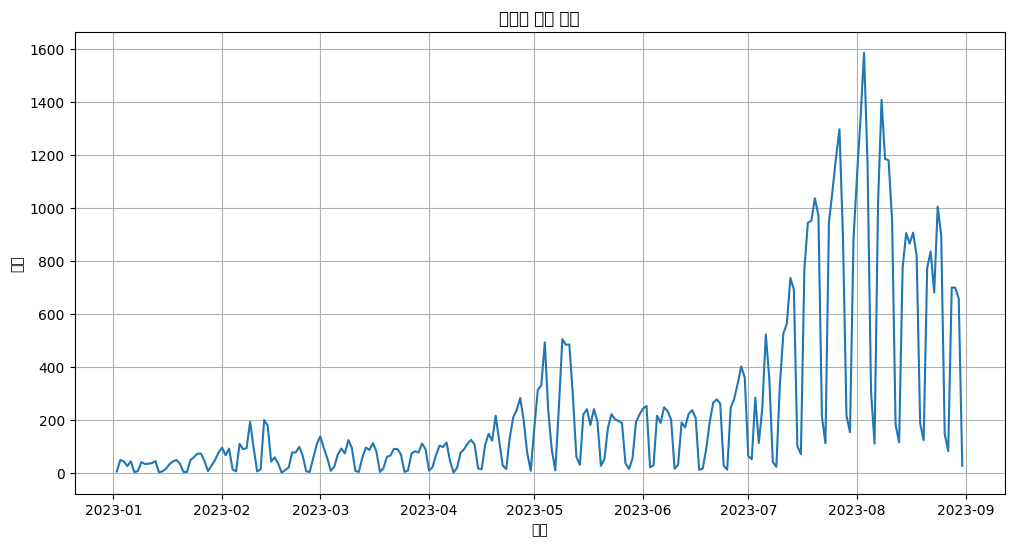

In [40]:
# 날짜별 뉴스 건수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
daily_counts.plot(title="날짜별 뉴스 건수")
plt.xlabel("날짜")
plt.ylabel("건수")
plt.grid(True)
plt.show()

In [ ]:
# 범주형 변수 빈도수 분석 (til_ifo, ctgy_cfc_ifo)
print("\ntil_ifo 빈도수:")
print(news['til_ifo'].value_counts())
print("\nctgy_cfc_ifo 빈도수:")
print(news['ctgy_cfc_ifo'].value_counts())


til_ifo 빈도수:
til_ifo
5 Dividend Growth Stocks With Upside To Analyst Targets                                            86
5 Dividend Aristocrats Where Analysts See Capital Gains                                            58
3 Stocks to Avoid This Week                                                                        49
3 Top Dividend Stocks to Maximize Your Retirement Income                                           49
Improve Your Retirement Income with These 3 Top-Ranked Dividend Stocks                             46
                                                                                                   ..
Raymond James & Associates Makes Revised Proposal for $75M Investment in Republic First Bancorp     1
scPharmaceuticals, Inc. (SCPH) Is a Great Choice for 'Trend' Investors, Here's Why                  1
Zhihu Appoints Henry Dachuan Sha As CFO                                                             1
France's InVivo to buy one of the world's oldest malthouses 

## 추가 EDA

In [45]:
# CategoryGroup
# ctry_cfc_info 컬럼에서 특정 키워드를 찾아 대분류(Stocks, Markets, Options 등)로 분류
def map_category_group(x):
    if not isinstance(x, str):
        return 'Others'
    x_lower = x.lower()
    if 'stocks' in x_lower:
        return 'Stocks'
    elif 'markets' in x_lower:
        return 'Markets'
    elif 'options' in x_lower:
        return 'Options'
    elif 'futures' in x_lower:
        return 'Futures'
    else:
        return 'Others'

news_2['CategoryGroup'] = news_2['ctgy_cfc_ifo'].apply(map_category_group)

# HasBuyWord / HasSellWord
# 제목(til_ifo)에 'buy', 'sell', 'short' 키워드가 포함되어 있는지 여부를 0/1로 표시
news_2['HasBuyWord'] = news_2['til_ifo'].str.contains(r'\bbuy\b', case=False, na=False).astype(int)
news_2['HasSellWord'] = news_2['til_ifo'].str.contains(r'\bsell\b', case=False, na=False).astype(int)
news_2['HasShortWord'] = news_2['til_ifo'].str.contains(r'\bshort\b', case=False, na=False).astype(int)

# 결과 확인
news_2.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,trd_dt,date,weekday,CategoryGroup,HasBuyWord,HasSellWord,HasShortWord
0,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,2023-01-03,2023-01-02,0,Markets,1,0,0
1,2023-01-02,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,"DICE,NUVL",2023-01-03,2023-01-02,0,Stocks,0,0,0
2,2023-01-02,SCPH,"scPharmaceuticals, Inc. (SCPH) Is a Great Choi...","Stocks,Investing",Zacks,"""When it comes to short-term investing or trad...",SCPH,2023-01-03,2023-01-02,0,Stocks,0,0,0
3,2023-01-02,IVVD,"Invivyd, Inc. (IVVD) Upgraded to Buy: Here's Why","Stocks,Investing",Zacks,"Investors might want to bet on Invivyd, Inc. (...",IVVD,2023-01-03,2023-01-02,0,Stocks,1,0,0
4,2023-01-02,BELFB,Is Bel Fuse (BELFB) Stock Outpacing Its Comput...,"Stocks,Investing",Zacks,For those looking to find strong Computer and ...,"BELFB,PERI",2023-01-03,2023-01-02,0,Stocks,0,0,0


In [46]:
news_2.drop(columns=['rld_ose_iem_tck_cd', 'rgs_dt'], inplace=True, errors='ignore')
news_2.head()

,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,trd_dt,date,weekday,CategoryGroup,HasBuyWord,HasSellWord,HasShortWord
0,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",2023-01-03,2023-01-02,0,Markets,1,0,0
1,NUVL,Are Medical Stocks Lagging DICE Therapeutics ...,"Stocks,Investing",Zacks,Investors interested in Medical stocks should ...,2023-01-03,2023-01-02,0,Stocks,0,0,0
2,SCPH,"scPharmaceuticals, Inc. (SCPH) Is a Great Choi...","Stocks,Investing",Zacks,"""When it comes to short-term investing or trad...",2023-01-03,2023-01-02,0,Stocks,0,0,0
3,IVVD,"Invivyd, Inc. (IVVD) Upgraded to Buy: Here's Why","Stocks,Investing",Zacks,"Investors might want to bet on Invivyd, Inc. (...",2023-01-03,2023-01-02,0,Stocks,1,0,0
4,BELFB,Is Bel Fuse (BELFB) Stock Outpacing Its Comput...,"Stocks,Investing",Zacks,For those looking to find strong Computer and ...,2023-01-03,2023-01-02,0,Stocks,0,0,0


## W2
### Task1. 시각화

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
import pandas as pd

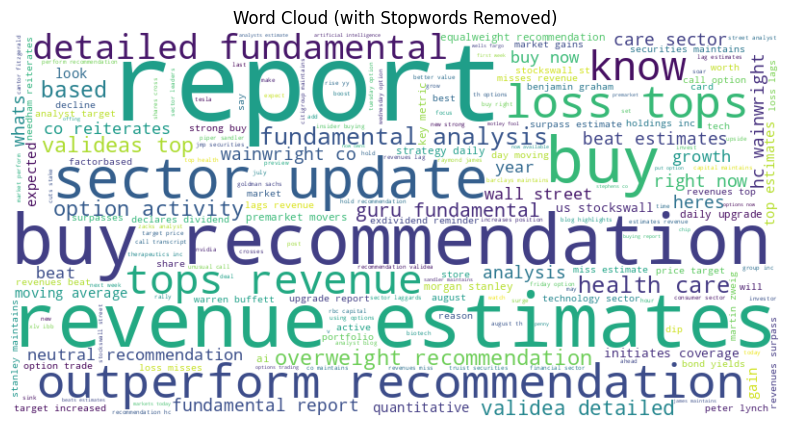

In [38]:
# 1) 텍스트 전처리
text_data = " ".join(news_2['til_ifo'].astype(str).tolist())
text_data = re.sub(r'[^a-zA-Z ]', '', text_data.lower())

# 2) WordCloud에 사용할 stopwords 정의
my_stopwords = set(STOPWORDS)
# 내장된 영어 불용어 외에 추가로 제거할 단어
my_stopwords.update(["to", "for", "the", "and", "of", "in", "on", "q", "stocks", "stock", "earnings"])

# 3) 워드클라우드 생성 시 stopwords 인자로 전달
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=my_stopwords  # 불용어 세트
).generate(text_data)

# 4) 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (with Stopwords Removed)')
plt.show()

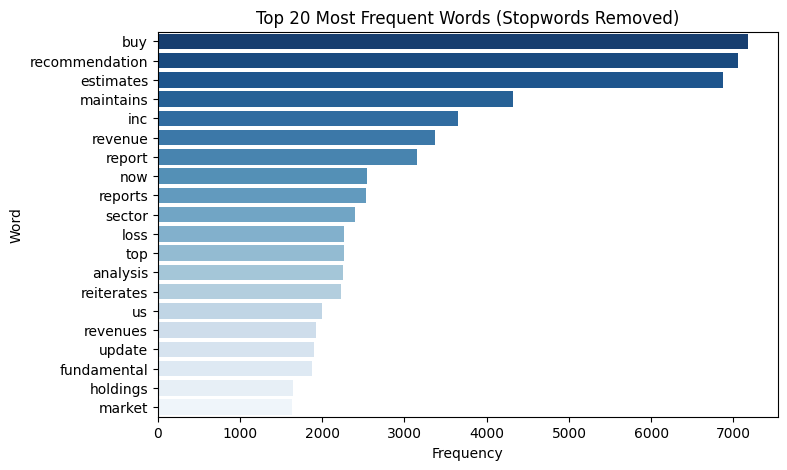

In [41]:
# 3) 전체 단어 리스트로 분할
words = text_data.split()

# 4) 불용어 제거
filtered_words = [w for w in words if w not in my_stopwords]

# 5) 단어 빈도 계산
word_counts = Counter(filtered_words)
most_common_20 = word_counts.most_common(20)

# 6) DataFrame 변환 및 시각화
df_common_20 = pd.DataFrame(most_common_20, columns=['word', 'count'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_common_20, x='count', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words (Stopwords Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

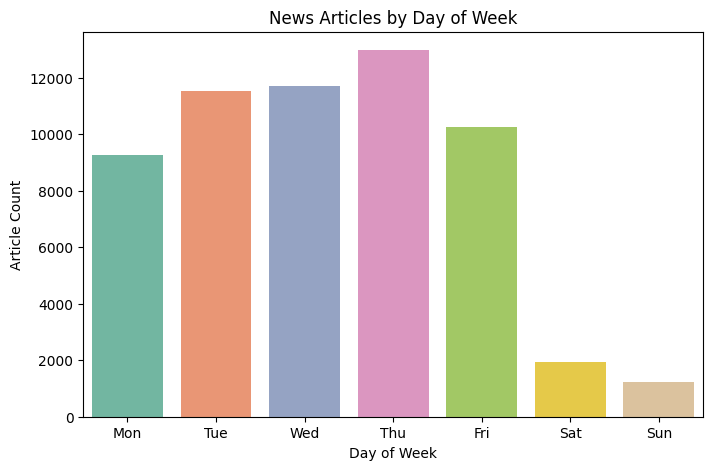

In [42]:
# 날짜 컬럼을 datetime으로 변환
news_2['date'] = pd.to_datetime(news_2['date'])

# 요일 추출 (월=0, 화=1, ... 일=6)
news_2['weekday'] = news_2['date'].dt.weekday

# 요일별 기사 수
weekday_count = news_2.groupby('weekday').size().reset_index(name='count')

# 요일 이름 매핑
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
weekday_count['weekday_name'] = weekday_count['weekday'].map(weekday_map)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_count, x='weekday_name', y='count', palette='Set2')
plt.title('News Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Article Count')
plt.show()

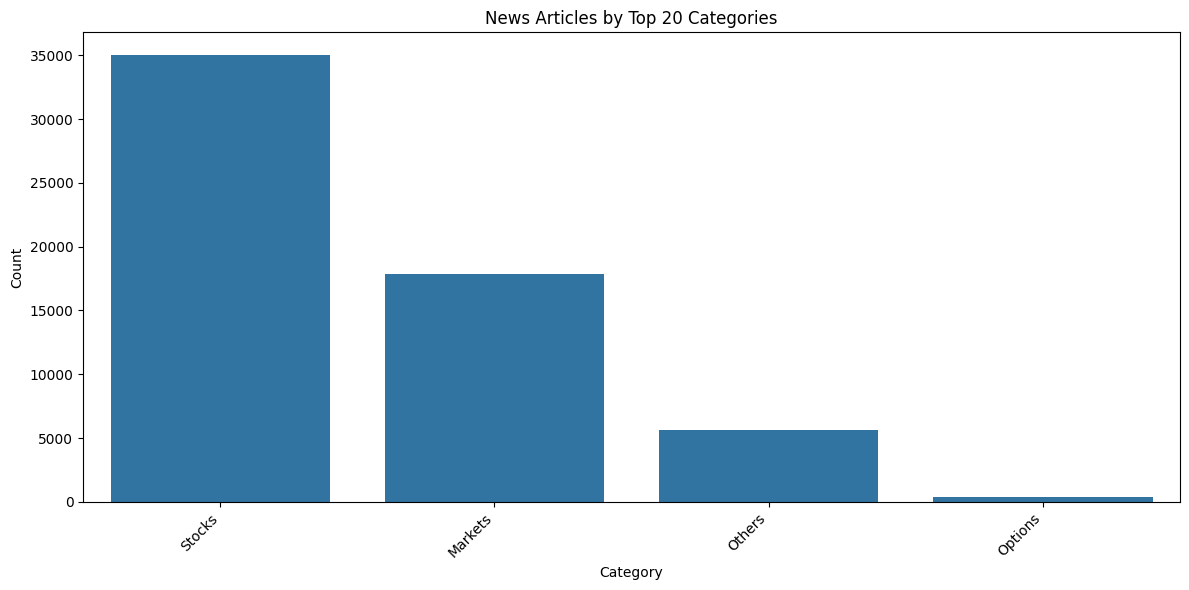

In [47]:
# 카테고리별 기사 수 계산
category_counts = news_2['CategoryGroup'].value_counts()

# 예: 상위 20개 카테고리만 추출
topN = 20
top_categories = category_counts.head(topN).index

# 상위 20개 카테고리에 해당하는 데이터만 필터링
news_2_topN = news_2[news_2['CategoryGroup'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.countplot(data=news_2_topN, x='CategoryGroup', order=top_categories)
plt.title(f'News Articles by Top {topN} Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # 레이블 45도 회전, 오른쪽 정렬
plt.tight_layout()
plt.show()


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

sentiment_labels = []
sentiment_scores = []

target_col = 'news_smy_ifo'  # 대상 텍스트 컬럼명

for text in news_2[target_col].fillna(''):
    pos_score = neg_score = obj_score = token_count = 0
    tokens = text.lower().split()  # 단순 공백 기반 토큰화

    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        synsets = wn.synsets(lemma)

        for synset in synsets:
            try:
                swn_synset = swn.senti_synset(synset.name())
                pos_score += swn_synset.pos_score()
                neg_score += swn_synset.neg_score()
                obj_score += swn_synset.obj_score()
                token_count += 1
            except:
                continue

    if token_count > 0:
        pos_score /= token_count
        neg_score /= token_count
        obj_score /= token_count

    if pos_score > neg_score:
        sentiment_labels.append('positive')
    elif pos_score < neg_score:
        sentiment_labels.append('negative')
    else:
        sentiment_labels.append('neutral')

    sentiment_scores.append(pos_score - neg_score)

news_2['sentiment'] = sentiment_labels
news_2['sentiment_score'] = sentiment_scores

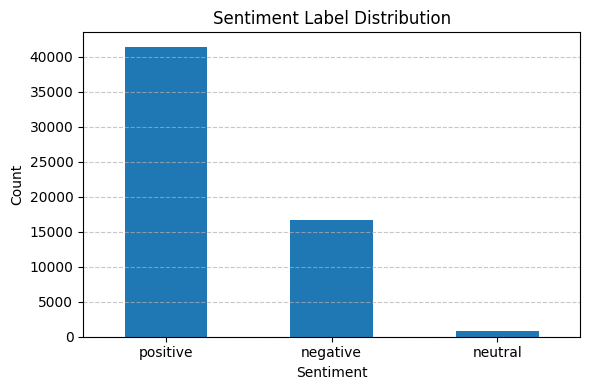

In [50]:
import matplotlib.pyplot as plt

# 감성 레이블 분포 시각화
sentiment_counts = news_2['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ✅ 주요 분석 결과
- `Stocks`, `Markets` 등 카테고리별 뉴스 비중 차이가 뚜렷하며, 감성 경향도 다름
- 전처리 및 피처 엔지니어링을 통해 단순 텍스트에서 유의미한 구조적 변수 도출 성공

---

## 🔎 발견한 인사이트
- 뉴스 제목만으로도 시장 분위기(`positive`/`negative`)를 대략적으로 분류 가능
- 카테고리 및 키워드에 따라 감성 분포가 다르며, 이는 시장 반응과 연관될 가능성 존재
- 단어 기반 피처만으로도 투자 관련 정보 탐색 및 이상 뉴스 선별에 효과적

---

## ⚠️ 현재까지의 한계점 및 고민 지점
- 뉴스 **본문 부재**로 세부 문맥 및 감정 흐름 반영 어려움
- **종가/변동률** 등 가격 정보를 제대로 활용하지 못해 실제 투자 판단과 연결하기에는 제한적
- 감성 라벨 자동 생성 정확도 한계 → 수작업 정제 또는 학습 개선 고민 필요
